In [10]:
%matplotlib inline
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Projeto 1
### Tirta  

### Super Computação

### Introducao

No primeiro projeto de SuperComputação iremos tratar o problema da simulação de física 2D. Faremos uma simulação simplificada em que todo corpo é representado por um retângulo se movimentando em um plano. Neste contexto, técnicas de Super Computação são importantes pois permitem  tanto aumentar o número de corpos na simulação quanto diminuir o intervalo de tempo usando nos cálculos. Apesar de não parecer muito realista, diversos jogos usam esta modelagem para tratar colisões e movimentações dos elementos do jogo. 

Os objetivos deste projeto são

1. implementar um projeto de média complexidade (em termos de especificações técnicas) em C++;
1. estudar efeito de opções de compilação e de vetorização em um projeto mais complexo que as atividades de sala de aula;
1. montar uma comparação de desempenho reprodutível e descritiva.


## Especificacoes do Projeto

O projeto foi dividido em duas classes: Rectangle e Collision separadas nos arquivos rectangle.cpp/hpp e collision.cpp/hpp.  

A classe Rectangle possui toda a informacao do retangulo. Enquanto a classe collision cuida da implementacao do algoritmo, movimento, atualizacao, checagem de colisao entre retangulos ou parede...

Além disso, o projeto possui um CMakeLists.txt que possibilita a compilação de diferentes executáveis com diferentes opções de otimização e vetorização. São eles:
* collision
* collision_O0
* collision_O1
* collision_O3
* collision_O3_SIMD


Para rodar, basta digitar a seguinte linha no seu terminal:```./build/[nome_do_arquivo] < entrada.txt```. 

In [16]:
def run_test(executable, input_file):
    with open('./' + input_file, 'rb', 0) as f:
        output = subprocess.check_output(['./build/' + str(executable)], stdin=f)
        output = output.decode("utf-8").splitlines()
        
    print("Executable: " + executable)
    print("Input File: " + input_file)
    print(output[-1])
    print(output[-2])
    print("-------------------------------")
    return [executable, input_file, output[-1], output[-2]]

In [17]:
executables = sorted([n for n in os.listdir("./build/") if n.startswith('collision') and n != 'collision'])
inputs = sorted([n for n in os.listdir("./") if n.startswith('entrada')])
data = []
for e in executables:
    for i in inputs:
        data.append(run_test(e, i))

Executable: collision_O0
Input File: entrada100
Quantidade de objetos: 100
Demorou: 0.693108
-------------------------------
Executable: collision_O0
Input File: entrada1000
Quantidade de objetos: 1000
Demorou: 226.815
-------------------------------
Executable: collision_O0
Input File: entrada500
Quantidade de objetos: 500
Demorou: 5.62634
-------------------------------
Executable: collision_O0
Input File: entrada800
Quantidade de objetos: 800
Demorou: 14.0192
-------------------------------
Executable: collision_O1
Input File: entrada100
Quantidade de objetos: 100
Demorou: 2.87507
-------------------------------
Executable: collision_O1
Input File: entrada1000
Quantidade de objetos: 1000
Demorou: 877.304
-------------------------------
Executable: collision_O1
Input File: entrada500
Quantidade de objetos: 500
Demorou: 20.4574
-------------------------------
Executable: collision_O1
Input File: entrada800
Quantidade de objetos: 800
Demorou: 166.502
-------------------------------
Exe

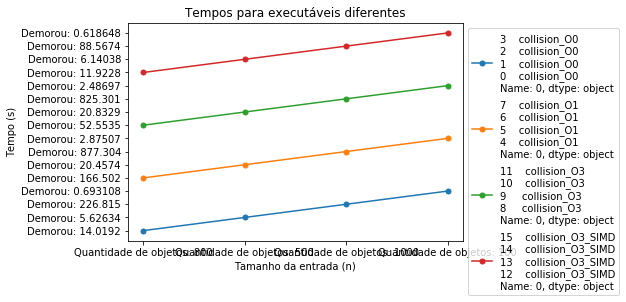

In [18]:
df = pd.DataFrame(data, dtype=np.float64)
df = df.sort_values([0, 2], ascending=False)
groups = df.groupby(0)
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group[2], group[3], marker='o', linestyle='-', ms=5, label=group[0])
plt.title('Tempos para executáveis diferentes')
plt.ylabel('Tempo (s)')
plt.xlabel('Tamanho da entrada (n)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Melhores tempo com o simulador O0 e O3 com SIMD e o uso de vetorizacao gera uma grande melhoria no desempenho. E um fato curioso eh a questao do O3 performar menos que o O0.